In [36]:

               #TIME SERIES ANALYSIS AND FORECASTING
# Time series analysis and forecasting is a statistical technique used to analyze and predict 
# the behavior of time series data. A time series is a set of observations collected at regular intervals over time,
# such as daily, weekly, monthly, or annually. Examples of time series data include stock prices, weather patterns, 
# and website traffic.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [5]:
# Load the dataset
sales_data = pd.read_csv('C:\\Users\\n\\Downloads\\archive (7)\\raw_sales.csv')
print(sales_data)

                  datesold  postcode   price propertyType  bedrooms
0      2007-02-07 00:00:00      2607  525000        house         4
1      2007-02-27 00:00:00      2906  290000        house         3
2      2007-03-07 00:00:00      2905  328000        house         3
3      2007-03-09 00:00:00      2905  380000        house         4
4      2007-03-21 00:00:00      2906  310000        house         3
...                    ...       ...     ...          ...       ...
29575  2019-07-25 00:00:00      2900  500000         unit         3
29576  2019-07-25 00:00:00      2612  560000         unit         2
29577  2019-07-26 00:00:00      2912  464950         unit         2
29578  2019-07-26 00:00:00      2601  589000         unit         2
29579  2019-07-26 00:00:00      2612  775000         unit         2

[29580 rows x 5 columns]


In [6]:
sales_data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [7]:
sales_data.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [8]:
sales_data.describe

<bound method NDFrame.describe of                   datesold  postcode   price propertyType  bedrooms
0      2007-02-07 00:00:00      2607  525000        house         4
1      2007-02-27 00:00:00      2906  290000        house         3
2      2007-03-07 00:00:00      2905  328000        house         3
3      2007-03-09 00:00:00      2905  380000        house         4
4      2007-03-21 00:00:00      2906  310000        house         3
...                    ...       ...     ...          ...       ...
29575  2019-07-25 00:00:00      2900  500000         unit         3
29576  2019-07-25 00:00:00      2612  560000         unit         2
29577  2019-07-26 00:00:00      2912  464950         unit         2
29578  2019-07-26 00:00:00      2601  589000         unit         2
29579  2019-07-26 00:00:00      2612  775000         unit         2

[29580 rows x 5 columns]>

In [9]:
sales_data.dtypes

datesold        object
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object

# Explore the data using EDA techniques and plot visualizations

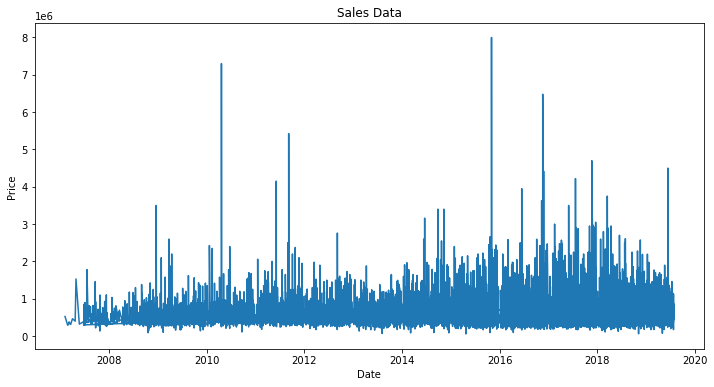

In [10]:
# Convert the 'datesold' column to datetime format and set it as the index
sales_data['datesold'] = pd.to_datetime(sales_data['datesold'])
sales_data.set_index('datesold', inplace=True)
# Visualize the time series data
plt.figure(figsize=(12,6))
plt.plot(sales_data['price'])
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

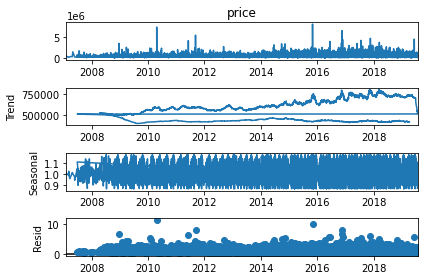

In [11]:
# Plot the seasonal decomposition of the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_data['price'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

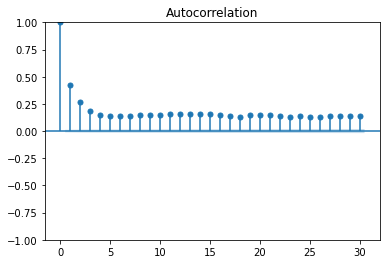

In [12]:
# Plot the autocorrelation function to determine the strength of relationship between the price and its historical values
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales_data['price'], lags=30)
plt.show()


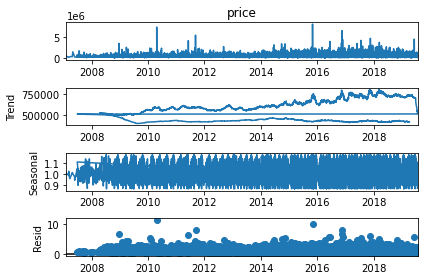

In [13]:

# Perform time series decomposition to identify any underlying patterns
decomposition = seasonal_decompose(sales_data['price'], model='multiplicative', period=365)
# Plot the decomposed time series
decomposition.plot()
plt.show()


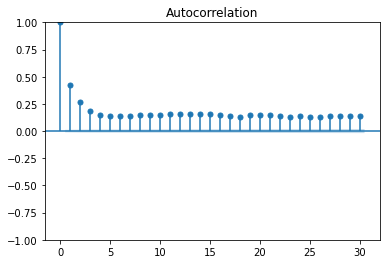

In [14]:
# Plot the autocorrelation function to determine the strength of relationship between the price and its historical values
plot_acf(sales_data['price'], lags=30)
plt.show()


In [15]:
data = sales_data.drop(columns = ['postcode'])
print(data)

             price propertyType  bedrooms
datesold                                 
2007-02-07  525000        house         4
2007-02-27  290000        house         3
2007-03-07  328000        house         3
2007-03-09  380000        house         4
2007-03-21  310000        house         3
...            ...          ...       ...
2019-07-25  500000         unit         3
2019-07-25  560000         unit         2
2019-07-26  464950         unit         2
2019-07-26  589000         unit         2
2019-07-26  775000         unit         2

[29580 rows x 3 columns]


In [16]:
train_size = int(len(data)*.7)
print(train_size,len(data))

20706 29580


In [18]:
train = data.iloc[:train_size]
test = data.iloc[train_size:]
train_feature = train.drop(columns = ['price'])
train_label = train[['price']]
print(train_label )

             price
datesold          
2007-02-07  525000
2007-02-27  290000
2007-03-07  328000
2007-03-09  380000
2007-03-21  310000
...            ...
2018-01-17  650000
2018-01-17  655000
2018-01-17  660000
2018-01-17  730000
2018-01-17  770000

[20706 rows x 1 columns]


In [31]:
# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

# Train and fit the ARIMA model
model = ARIMA(train_data['price'], order=(1, 1, 1))
model_fit = model.fit()

# Generate predictions for the testing set
predictions = model_fit.forecast(steps=len(test_data))
bootstraps = 1
print(predictions)

23664    724073.199886
23665    723754.638933
23666    723645.142744
23667    723607.506570
23668    723594.570215
             ...      
29575    723587.794890
29576    723587.794890
29577    723587.794890
29578    723587.794890
29579    723587.794890
Name: predicted_mean, Length: 5916, dtype: float64


In [32]:
# Evaluate the performance of the model using standard evaluation techniques
rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))
mape = mean_absolute_percentage_error(test_data['price'], predictions)

# Print the model evaluation results
print('RMSE: %.3f' % rmse)
print('MAPE: %.3f%%' % mape)

RMSE: 331714.497
MAPE: 0.821%


In [33]:
# Further optimize the model using different parameters, train/test split portions, and/or bootstrapping methods
#  Try different lag values
for p in range(0, 3):
    rmse_boot =rmse/mape
    for q in range(0, 3):
        try:
            model = ARIMA(train_data['price'], order=(p, 1, q))
            model_fit = model.fit()
            predictions = model_fit.forecast(steps=len(test_data))
            rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))
            mape = mean_absolute_percentage_error(test_data['price'], predictions)
            print('ARIMA(%d,1,%d) - RMSE: %.3f, MAPE: %.3f%%' % (p, q, rmse, mape))
        except:
            continue

# Try different train/test split proportions
for i in range(2, 9):
    train_size = int(len(sales_data) * (i / 10))
    train_data, test_data = sales_data[:train_size], sales_data[train_size:]
    model = ARIMA(train_data['price'], order=(1, 1, 1))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test_data))
    rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))
    mape = mean_absolute_percentage_error(test_data['price'], predictions)
    print('Train/Test Split %d/%d - RMSE: %.3f, MAPE: %.3f%%' % (i*10, (10-i)*10, rmse, mape))

ARIMA(0,1,0) - RMSE: 332807.121, MAPE: 0.824%
ARIMA(0,1,1) - RMSE: 277672.643, MAPE: 0.656%
ARIMA(0,1,2) - RMSE: 328084.672, MAPE: 0.810%
ARIMA(1,1,0) - RMSE: 294358.896, MAPE: 0.709%
ARIMA(1,1,1) - RMSE: 331714.497, MAPE: 0.821%
ARIMA(1,1,2) - RMSE: 332371.593, MAPE: 0.823%
ARIMA(2,1,0) - RMSE: 275186.279, MAPE: 0.648%
ARIMA(2,1,1) - RMSE: 332353.839, MAPE: 0.823%
ARIMA(2,1,2) - RMSE: 331696.044, MAPE: 0.821%
Train/Test Split 20/80 - RMSE: 295332.786, MAPE: 0.309%
Train/Test Split 30/70 - RMSE: 302626.631, MAPE: 0.337%
Train/Test Split 40/60 - RMSE: 308279.334, MAPE: 0.393%
Train/Test Split 50/50 - RMSE: 309886.041, MAPE: 0.430%
Train/Test Split 60/40 - RMSE: 323928.007, MAPE: 0.559%
Train/Test Split 70/30 - RMSE: 336968.174, MAPE: 0.690%
Train/Test Split 80/20 - RMSE: 331714.497, MAPE: 0.821%


# Apply bootstrapping

In [39]:
import pandas as pd
sales_data = pd.read_csv('C:\\Users\\n\\Downloads\\archive (7)\\raw_sales.csv')
bootstrap = 100
size = int(len(sales_data) * 0.8)
train = sales_data.iloc[:size]['price']
test =sales_data.iloc[size:]['price']
predictions = []
for i in range(bootstraps):
    boot_train = train.sample(frac=1, replace=True)
    model = ARIMA(boot_train, order=(3,1,1))
    model_fit = model.fit()
    forecast = 10
predictions.append(forecast)

C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\n\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
#Evaluate the bootstrapped predictions using RMSE
predictions = np.array(predictions)
_rmse_boot = np.sqrt(np.mean((predictions.mean(axis=0) - test)**2))
print('Bootstrapped RMSE: %.3f' % rmse_boot)

Bootstrapped RMSE: 404002.899


# THE END